In [63]:
import pandas as pd
import datetime
import os
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Task 1

First of all, it is necessary to get paths to both datasets. It is stored in the list **filenames**.

In [2]:
# put datasets' paths into the list
datasets_path = 'C:/Users/User/Desktop/Masters/DataEng/coursework/datasets/'
filenames = [datasets_path + x for x in os.listdir(datasets_path)]
print filenames

['C:/Users/User/Desktop/Masters/DataEng/coursework/datasets/rawpvr_2018-02-01_28d_1083 TueFri.csv', 'C:/Users/User/Desktop/Masters/DataEng/coursework/datasets/rawpvr_2018-02-01_28d_1415 TueFri.csv']


To continue, dataset is loaded into the **pandas.DataFrame** class and the first five rows were shown.

In [3]:
# read 1803 dataset and print first five rows
dataframe_1083 = pd.read_csv(filenames[0], sep=',')
dataframe_1083.head(5)

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
0,2018-02-02 00:00:03.050000,6,SB_NS,2,South,38.525,NaN,NaN,0,NaN
1,2018-02-02 00:00:22.010000,5,SB_MID,2,South,32.310,NaN,NaN,0,NaN
2,2018-02-02 00:00:22.020000,4,SB_OS,2,South,44.739,NaN,NaN,0,NaN
3,2018-02-02 00:00:36.040000,6,SB_NS,2,South,33.554,NaN,NaN,0,NaN
4,2018-02-02 00:00:49.070000,6,SB_NS,2,South,39.768,12.3,11.847,0,NaN


In [4]:
# show dataset shape
print "Dataset shape:", dataframe_1083.shape

Dataset shape: (503768, 10)


Weekday number and name were extracted from the **Date** column and put into the **Flag** and **Flag Text** columns in approprite formats.

In [5]:
# get date column into singal variable and convert to datetime format
data_datetime = pd.to_datetime(dataframe_1083['Date'])
dataframe_1083.Date = data_datetime
# set Flags column values using weekday function, +1 because counting starts from 0 (Monday) 
dataframe_1083['Flags'] = data_datetime.dt.weekday + 1
# set Flag Text column values using weekday_name function
dataframe_1083['Flag Text'] = data_datetime.dt.weekday_name
# print first 5 rows
dataframe_1083.head(15)

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
0,2018-02-02 00:00:03.050,6,SB_NS,2,South,38.525,NaN,NaN,5,Friday
1,2018-02-02 00:00:22.010,5,SB_MID,2,South,32.310,NaN,NaN,5,Friday
2,2018-02-02 00:00:22.020,4,SB_OS,2,South,44.739,NaN,NaN,5,Friday
3,2018-02-02 00:00:36.040,6,SB_NS,2,South,33.554,NaN,NaN,5,Friday
4,2018-02-02 00:00:49.070,6,SB_NS,2,South,39.768,12.300,11.847,5,Friday
5,2018-02-02 00:00:52.090,2,NB_MID,1,North,64.623,NaN,NaN,5,Friday
6,2018-02-02 00:00:55.060,1,NB_NS,1,North,29.205,6.319,NaN,5,Friday
7,2018-02-02 00:00:58.010,2,NB_MID,1,North,37.283,6.200,6.089,5,Friday
8,2018-02-02 00:01:03.050,6,SB_NS,2,South,44.739,14.800,14.575,5,Friday
9,2018-02-02 00:01:04.060,2,NB_MID,1,North,41.010,5.155,5.242,5,Friday


Tuesday and Friday total traffic volume was calculated.

In [6]:
# count and print Friday and Tuesday total trafic volume
print 'Tuesday total traffic volume: ' + str(dataframe_1083.loc[dataframe_1083['Flags'] == 2].shape[0])
print 'Friday total traffic volume: ' + str(dataframe_1083.loc[dataframe_1083['Flags'] == 5].shape[0])

Tuesday total traffic volume: 248017
Friday total traffic volume: 255751


# Task 2

Firstly, recordings regarding to Tuesday, North direction and time interval from 9:00 inclusive and 10:00 exclusive were selected, put into the new **DataFrame** and the first five rows were shown in the table below.

In [7]:
# Select rows with North lane direction and Tuesday Flag Text between 9:00 and 10:00
df_1083_north_tue_9 = dataframe_1083.loc[(dataframe_1083['Direction Name'] == 'North') & \
                                       (dataframe_1083['Flag Text'] == 'Tuesday') & \
                                       (dataframe_1083['Date'].dt.time >= datetime.time(9, 0, 0)) & \
                                       (dataframe_1083['Date'].dt.time < datetime.time(10, 0, 0))]
# print shape of these rows and print first five of them
print df_1083_north_tue_9.shape
df_1083_north_tue_9.head()

(9721, 10)


,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
78847,2018-02-06 09:00:01.030,2,NB_MID,1,North,32.932,5.026,NaN,2,Tuesday
78848,2018-02-06 09:00:01.030,3,NB_OS,1,North,32.310,3.946,NaN,2,Tuesday
78849,2018-02-06 09:00:01.170,1,NB_NS,1,North,31.691,3.035,NaN,2,Tuesday
78851,2018-02-06 09:00:03.040,3,NB_OS,1,North,32.310,2.250,1.802,2,Tuesday
78852,2018-02-06 09:00:04.080,2,NB_MID,1,North,29.825,3.000,2.222,2,Tuesday


To count the number of vehicles for each Tuesday, North direction and between 9 and 10 am Date column was extracted and all rows were grouped by and the number of rows was counted.

In [8]:
# extract date column
datetime_only = pd.DataFrame(df_1083_north_tue_9.Date.values)
datetime_only.head()

,0
0,2018-02-06 09:00:01.030
1,2018-02-06 09:00:01.030
2,2018-02-06 09:00:01.170
3,2018-02-06 09:00:03.040
4,2018-02-06 09:00:04.080


In [9]:
# extract date from datetime in date column
date_only = pd.DataFrame(datetime_only[0].dt.date)
date_only.columns = ['Date']
date_only.shape

(9721, 1)

In [10]:
# group by all dates with counting of rows
count_date = date_only.groupby(['Date']).size().reset_index(name='count')
count_date

,Date,count
0,2018-02-06,2537
1,2018-02-13,2447
2,2018-02-20,2311
3,2018-02-27,2426


Using table above we could calculate all necessary measures:
* range: substract minimal count value from the maximal one;
* quartiles: using **pandas.DataFrame**'s method **quantile** for 25, 50, 75 percentiles; the method supports different interpolations, the linear one was chosen;
* interquartile range by substracting 1st Quartile from 3rd Quartile

In [11]:
# calculate and print the range
print 'Range:', int(max(count_date['count']) - min(count_date['count']))

Range: 226


In [12]:
# calculate quartiles using interpolation 
interpolation = 'linear'
q1 = count_date['count'].quantile(0.25, interpolation=interpolation)
q2 = count_date['count'].quantile(0.5, interpolation=interpolation)
q3 = count_date['count'].quantile(0.75, interpolation=interpolation)

In [13]:
# print quartiles
print 'First quartile:', float(q1)
print 'Second quartile:', float(q2)
print 'Third quartile:', float(q3)

First quartile: 2397.25
Second quartile: 2436.5
Third quartile: 2469.5


In [14]:
# calculate and print interquartile range
int_q_range = q3 - q1
print 'Interquartile range:', float(int_q_range)

Interquartile range: 72.25


# Task 3

To start Task 3, Tuesday weekday was chosen and Tuesday recording were selected from the dataset into the new **DataFrame**. After that, Tuesday **DataFrame** was separated to North and South ones by selecting North and South recordings respectively.

In [15]:
# select tuesday recordings and separate dataset into two -  for North and South directions 
day = 'Tuesday'
df_tue = dataframe_1083.loc[dataframe_1083['Flag Text'] == day]
df_tue_North = df_tue.loc[dataframe_1083['Direction Name'] == 'North']
df_tue_South = df_tue.loc[dataframe_1083['Direction Name'] == 'South']

In [16]:
# first five rows of Tuesday North dataset
df_tue_North.head()

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
64601,2018-02-06 00:00:07.010,3,NB_OS,1,North,45.361,NaN,NaN,2,Tuesday
64603,2018-02-06 00:00:14.020,2,NB_MID,1,North,33.554,NaN,NaN,2,Tuesday
64604,2018-02-06 00:00:41.060,2,NB_MID,1,North,44.739,NaN,NaN,2,Tuesday
64607,2018-02-06 00:01:23.060,3,NB_OS,1,North,37.903,NaN,NaN,2,Tuesday
64608,2018-02-06 00:01:24.050,2,NB_MID,1,North,39.768,43.9,43.6,2,Tuesday


In [17]:
# first five rows of Tuesday South dataset
df_tue_South.head()

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
64602,2018-02-06 00:00:07.010,6,SB_NS,2,South,36.661,NaN,NaN,2,Tuesday
64605,2018-02-06 00:00:41.070,6,SB_NS,2,South,37.283,NaN,NaN,2,Tuesday
64606,2018-02-06 00:01:21.040,5,SB_MID,2,South,45.361,NaN,NaN,2,Tuesday
64611,2018-02-06 00:01:32.060,6,SB_NS,2,South,39.768,50.9,50.642,2,Tuesday
64612,2018-02-06 00:01:33.070,5,SB_MID,2,South,45.361,11.3,11.083,2,Tuesday


To make further comparisons for selecting recordings recarding to different time intervals and get all Tuesday dates, **Date** column were extracted into the separate **DataFrame**. 

In [18]:
#  extract date column for North dataset and print it
datetime_north_df = pd.DataFrame(df_tue_North.Date.values)
datetime_north_df.columns = ['Datetime']
datetime_north_df.head()

,Datetime
0,2018-02-06 00:00:07.010
1,2018-02-06 00:00:14.020
2,2018-02-06 00:00:41.060
3,2018-02-06 00:01:23.060
4,2018-02-06 00:01:24.050


In [19]:
# extract dates from datetime
datetime_north_df['Date'] = pd.DataFrame(datetime_north_df['Datetime'].dt.date)
datetime_north_df.head()

,Datetime,Date
0,2018-02-06 00:00:07.010,2018-02-06
1,2018-02-06 00:00:14.020,2018-02-06
2,2018-02-06 00:00:41.060,2018-02-06
3,2018-02-06 00:01:23.060,2018-02-06
4,2018-02-06 00:01:24.050,2018-02-06


My main idea of counting mean values for each time interval is to count the whole number of recordings regarding to each time interval and each Tuesday date. So it will be a table with time intervals in vertical axis and Tuesday dates in the horisontal one. After that it will be possible to count mean value for each time interval just by calculating means values for each row.

In [20]:
# get dates of all Tuesdays
unique_north_dates = datetime_north_df.Date.unique()
print unique_north_dates

[datetime.date(2018, 2, 6) datetime.date(2018, 2, 13)
 datetime.date(2018, 2, 20) datetime.date(2018, 2, 27)]


In [21]:
# flag for initialising DataFrame
init_flag = False
# for each Tuesday calculate number of vehicles for each time interval
for date in unique_north_dates:
    freq_list = []
    tmp = datetime_north_df.loc[datetime_north_df['Date'] == date].set_index('Datetime')
    for i in range(24):
        start_time_string = str(i) + ':00'
        if i != 23:
            end_time_string = str(i + 1) + ':00'
        else:
            end_time_string = '00:00'
        freq_list.append(tmp.between_time(start_time=start_time_string, end_time=end_time_string, \
                                          include_start=True, include_end=False).shape[0])
    if not init_flag:
        north_freq_df = pd.DataFrame(freq_list)
        north_freq_df.columns = [date]
        init_flag = True
    else:
        north_freq_df[date] = freq_list

The table containing number of vehicles for each Tuesday and each time interval is shown below. Each index of the table is an hour of time interval, e.g. 0 index is time interval between 00:00 inclusively and 01:00 exclusively. 

In [22]:
north_freq_df

,2018-02-06,2018-02-13,2018-02-20,2018-02-27
0,130,124,133,119
1,51,71,74,56
2,48,42,36,44
3,60,61,49,42
4,119,104,105,105
5,381,359,358,348
6,1268,1261,1286,1225
7,3189,2923,3030,2664
8,2803,2807,2742,2556
9,2537,2447,2311,2426


To check that I have not lost any recordings, the number of rows in initial North dataset was calculated as well as the sum of all values in the table above. Thus, if they are equal, probably, all recordings are in the table.

In [23]:
# just to check that table above contains all Tuesday North recordings
print 'Sum of all numbers in the table:', north_freq_df.sum().sum()
print 'Number of vehicles going north:', df_tue_North.shape[0]

Sum of all numbers in the table: 124578
Number of vehicles going north: 124578


In [24]:
import numpy as np
from matplotlib import pyplot as plt

Mean values were calculated for each time interval and the appropriate column was added to the table.

In [25]:
# calculate mean numbers of vehicles for each interval
north_freq_df['mean'] = north_freq_df.mean(axis=1)
north_freq_df

,2018-02-06,2018-02-13,2018-02-20,2018-02-27,mean
0,130,124,133,119,126.50
1,51,71,74,56,63.00
2,48,42,36,44,42.50
3,60,61,49,42,53.00
4,119,104,105,105,108.25
5,381,359,358,348,361.50
6,1268,1261,1286,1225,1260.00
7,3189,2923,3030,2664,2951.50
8,2803,2807,2742,2556,2727.00
9,2537,2447,2311,2426,2430.25


Using the table above the histogram was plotted.

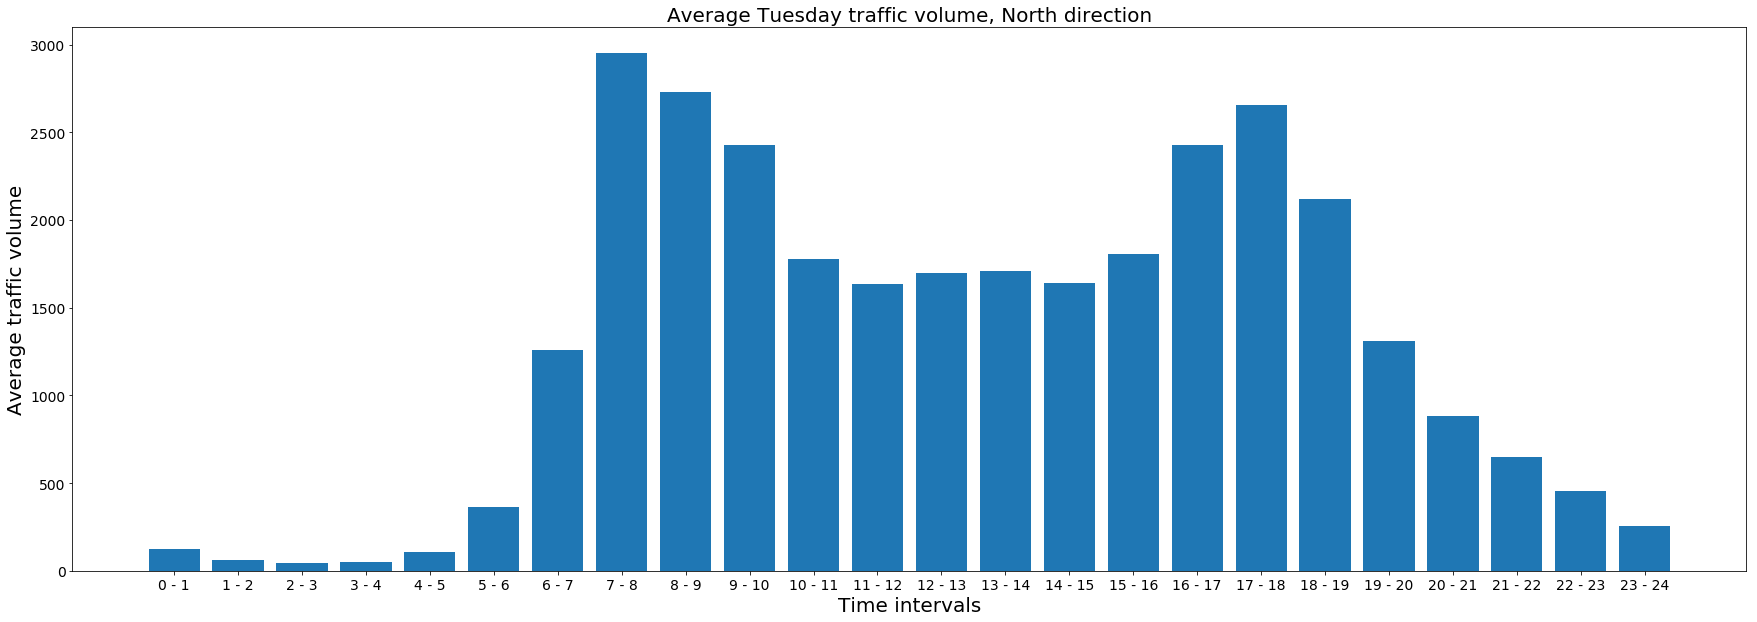

In [26]:
# plotting bar chart
mean_freq = np.array(north_freq_df['mean'])
time_ints = []
# make strings for each time interval, e.g. '8 - 9' for between 8:00 and 9:00
for i in range(24):
    time_ints.append(str(i) + ' - ' + str(i + 1))
x = np.arange(24)
plt.figure(figsize=(30, 10))
plt.bar(x, mean_freq)
plt.xticks(x, tuple(time_ints), fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Tuesday traffic volume, North direction', fontsize = 20)
plt.xlabel('Time intervals', fontsize = 20)
plt.ylabel('Average traffic volume', fontsize = 20)
plt.show()

### "South" part of the task

To complete the "South" part of the task, all steps of the development for "North" one were applied to the Tuesday South **DataFrame**.

In [27]:
# repeat all steps above for South dataset 
# extract only datetime from South dataset
datetime_south_df = pd.DataFrame(df_tue_South.Date.values)
datetime_south_df.columns = ['Datetime']
datetime_south_df.head()

,Datetime
0,2018-02-06 00:00:07.010
1,2018-02-06 00:00:41.070
2,2018-02-06 00:01:21.040
3,2018-02-06 00:01:32.060
4,2018-02-06 00:01:33.070


In [28]:
# extract only date from datetime
datetime_south_df['Date'] = pd.DataFrame(datetime_south_df['Datetime'].dt.date)
datetime_south_df.head()

,Datetime,Date
0,2018-02-06 00:00:07.010,2018-02-06
1,2018-02-06 00:00:41.070,2018-02-06
2,2018-02-06 00:01:21.040,2018-02-06
3,2018-02-06 00:01:32.060,2018-02-06
4,2018-02-06 00:01:33.070,2018-02-06


In [29]:
# get unique Tuesdays dates for South direction
unique_south_dates = datetime_south_df.Date.unique()
print unique_south_dates

[datetime.date(2018, 2, 6) datetime.date(2018, 2, 13)
 datetime.date(2018, 2, 20) datetime.date(2018, 2, 27)]


In [30]:
# flag for initialising DataFrame
init_flag = False
# for each Tuesday calculate number of vehicles for each time interval
for date in unique_south_dates:
    freq_list = []
    tmp = datetime_south_df.loc[datetime_south_df['Date'] == date].set_index('Datetime')
    for i in range(24):
        start_time_string = str(i) + ':00'
        if i != 23:
            end_time_string = str(i + 1) + ':00'
        else:
            end_time_string = '00:00'
        freq_list.append(tmp.between_time(start_time=start_time_string, end_time=end_time_string, include_start=True, include_end=False).shape[0])
    if not init_flag:
        south_freq_df = pd.DataFrame(freq_list)
        south_freq_df.columns = [date]
        init_flag = True
    else:
        south_freq_df[date] = freq_list

In [31]:
south_freq_df

,2018-02-06,2018-02-13,2018-02-20,2018-02-27
0,197,160,163,131
1,118,95,80,78
2,96,74,73,67
3,106,80,59,74
4,152,119,107,104
5,292,279,291,297
6,897,813,886,853
7,2145,1991,1992,1932
8,2194,2130,2190,2026
9,1559,1589,1651,1394


In [32]:
# just to check that table above contains all Tuesday North recordings
print 'Sum of all numbers in the table:', south_freq_df.sum().sum()
print 'Number of vehicles going south:', df_tue_South.shape[0]

Sum of all numbers in the table: 123439
Number of vehicles going south: 123439


The similiar table were created for South direction vehicles.

In [33]:
# calculate mean numbers of vehicles for each interval
south_freq_df['mean'] = south_freq_df.mean(axis=1)
south_freq_df

,2018-02-06,2018-02-13,2018-02-20,2018-02-27,mean
0,197,160,163,131,162.75
1,118,95,80,78,92.75
2,96,74,73,67,77.50
3,106,80,59,74,79.75
4,152,119,107,104,120.50
5,292,279,291,297,289.75
6,897,813,886,853,862.25
7,2145,1991,1992,1932,2015.00
8,2194,2130,2190,2026,2135.00
9,1559,1589,1651,1394,1548.25


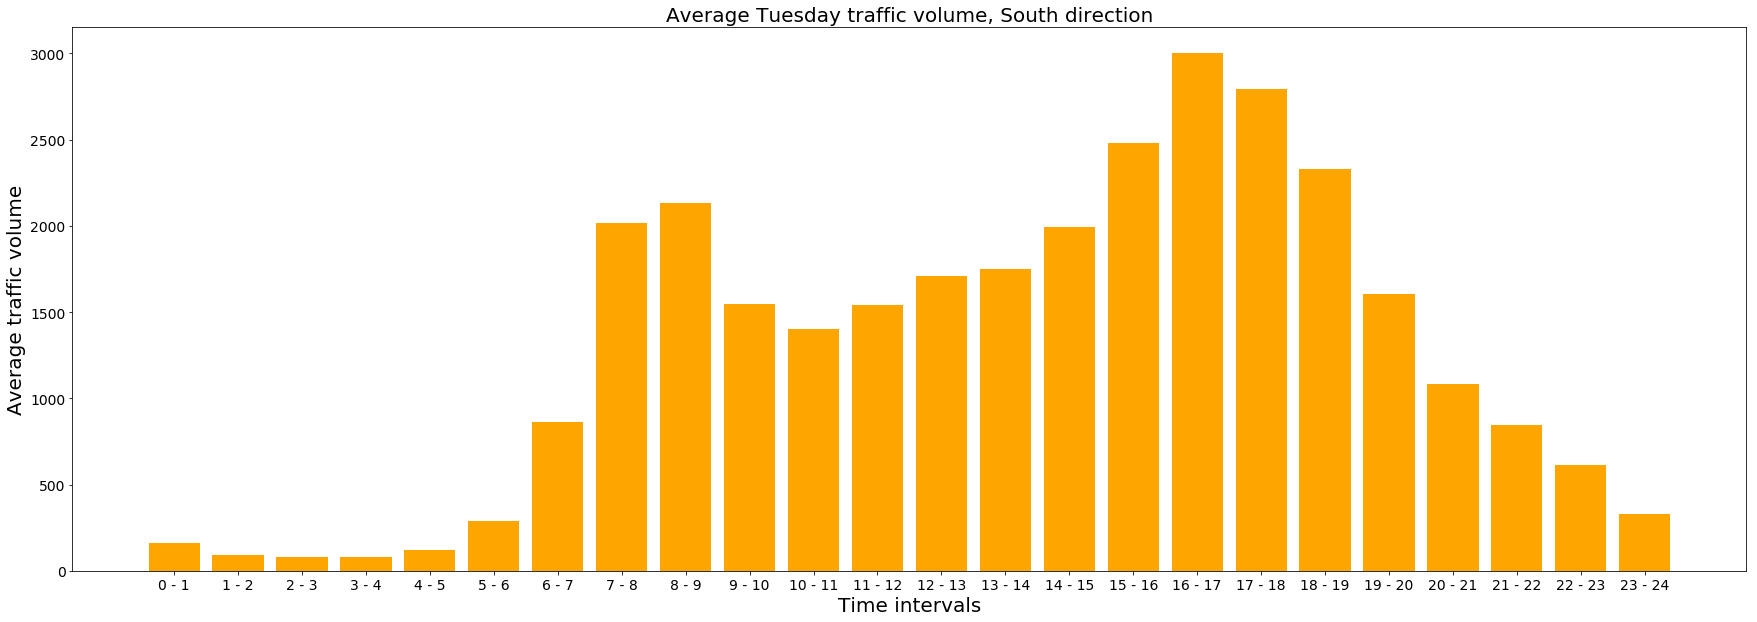

In [34]:
# plotting bar chart
mean_freq = np.array(south_freq_df['mean'])
plt.figure(figsize=(30, 10))
plt.bar(x, mean_freq, color='orange')
plt.xticks(x, tuple(time_ints), fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Tuesday traffic volume, South direction', fontsize = 20)
plt.xlabel('Time intervals', fontsize = 20)
plt.ylabel('Average traffic volume', fontsize = 20)
plt.show()

# Task 4

In [35]:
# Select rows for Tuesdays and NB_MID Lane 
nbmid_tue_df = dataframe_1083.loc[(dataframe_1083['Lane Name'] == 'NB_MID') & (dataframe_1083['Flag Text'] == 'Tuesday')]

In [36]:
# append time column and select rows between 7:00 and 19:00
nbmid_tue_df['time'] = nbmid_tue_df['Date'].dt.time
time_start = datetime.time(7, 0, 0)
time_end = datetime.time(19, 0, 0)
nbmid_tue_7_19_df = nbmid_tue_df.loc[(nbmid_tue_df['time'] >= time_start) & (nbmid_tue_df['time'] < time_end)]
# show selected rows
nbmid_tue_7_19_df

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text,time
68517,2018-02-06 07:00:01.160,2,NB_MID,1,North,27.962,1.720,NaN,2,Tuesday,07:00:01.160000
68518,2018-02-06 07:00:03.000,2,NB_MID,1,North,27.962,2.480,1.992,2,Tuesday,07:00:03
68521,2018-02-06 07:00:04.020,2,NB_MID,1,North,27.962,1.520,0.856,2,Tuesday,07:00:04.020000
68524,2018-02-06 07:00:05.020,2,NB_MID,1,North,29.205,1.226,0.680,2,Tuesday,07:00:05.020000
68529,2018-02-06 07:00:07.020,2,NB_MID,1,North,29.825,2.137,1.694,2,Tuesday,07:00:07.020000
68537,2018-02-06 07:00:10.080,2,NB_MID,1,North,27.340,3.150,2.270,2,Tuesday,07:00:10.080000
68538,2018-02-06 07:00:11.020,2,NB_MID,1,North,29.825,1.500,1.073,2,Tuesday,07:00:11.020000
68542,2018-02-06 07:00:13.020,2,NB_MID,1,North,32.310,2.146,1.662,2,Tuesday,07:00:13.020000
68544,2018-02-06 07:00:14.000,2,NB_MID,1,North,30.447,1.139,0.468,2,Tuesday,07:00:14
68547,2018-02-06 07:00:15.150,2,NB_MID,1,North,27.340,1.841,NaN,2,Tuesday,07:00:15.150000


In [37]:
# count missing Gap and Headway values for selected rows
print 'Number of missing Gap values for NB_MID for Tuesdays 7:00 - 19:00:', nbmid_tue_7_19_df['Gap (s)'].isna().sum()
print 'Number of missing Headway values for NB_MID for Tuesdays 7:00 - 19:00:', nbmid_tue_7_19_df['Headway (s)'].isna().sum()

Number of missing Gap values for NB_MID for Tuesdays 7:00 - 19:00: 685
Number of missing Headway values for NB_MID for Tuesdays 7:00 - 19:00: 281


In [38]:
# Select recrdings with missing Headway, Gap or both and append hour column to them (this column will be useful later)
gap_headway_nan = nbmid_tue_7_19_df.loc[(nbmid_tue_7_19_df['Headway (s)'].isnull()) | (nbmid_tue_7_19_df['Gap (s)'].isnull())]
gap_headway_nan['hour'] = gap_headway_nan.Date.dt.hour
gap_headway_nan

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text,time,hour
68517,2018-02-06 07:00:01.160,2,NB_MID,1,North,27.962,1.720,NaN,2,Tuesday,07:00:01.160000,7
68547,2018-02-06 07:00:15.150,2,NB_MID,1,North,27.340,1.841,NaN,2,Tuesday,07:00:15.150000,7
68888,2018-02-06 07:05:29.000,2,NB_MID,1,North,34.798,NaN,NaN,2,Tuesday,07:05:29,7
69204,2018-02-06 07:10:20.020,2,NB_MID,1,North,35.417,NaN,NaN,2,Tuesday,07:10:20.020000,7
69653,2018-02-06 07:15:16.160,2,NB_MID,1,North,51.575,3.947,NaN,2,Tuesday,07:15:16.160000,7
70113,2018-02-06 07:20:16.000,2,NB_MID,1,North,22.369,2.300,NaN,2,Tuesday,07:20:16,7
70222,2018-02-06 07:21:30.010,2,NB_MID,1,North,7.456,3.900,NaN,2,Tuesday,07:21:30.010000,7
70573,2018-02-06 07:25:20.010,2,NB_MID,1,North,3.729,5.100,NaN,2,Tuesday,07:25:20.010000,7
70822,2018-02-06 07:28:08.000,2,NB_MID,1,North,19.262,0.987,NaN,2,Tuesday,07:28:08,7
71025,2018-02-06 07:30:17.010,2,NB_MID,1,North,16.777,3.000,NaN,2,Tuesday,07:30:17.010000,7


In [39]:
# make tmp dataset for Tuesdays NB MID 7-19 without missing values
nbmid_tue_df_without_nan_gap = nbmid_tue_7_19_df.dropna(subset=['Gap (s)'])
nbmid_tue_df_without_nan_gap['hours'] = nbmid_tue_df_without_nan_gap.Date.dt.hour
nbmid_tue_df_without_nan_headway = nbmid_tue_7_19_df.dropna(subset=['Headway (s)'])
nbmid_tue_df_without_nan_headway['hours'] = nbmid_tue_df_without_nan_headway.Date.dt.hour

# all_gaps and all_headways will contain lists of all Gap values for each time interval
all_gaps = []
all_headways = []
# for each time interval put all Gap and Headway values in appropriate list.
for i in range(7, 19):
    # temporary dataframe for time interval i
    tmp_gap = nbmid_tue_df_without_nan_gap.loc[nbmid_tue_df_without_nan_gap['hours'] == i]
    tmp_headway = nbmid_tue_df_without_nan_headway.loc[nbmid_tue_df_without_nan_headway['hours'] == i]
    # get Gap and Headway values for this time interval and store in appropriate list
    gaps = tmp_gap['Gap (s)'].values
    headways = tmp_headway['Headway (s)'].values
    # append list to all_gaps
    all_gaps.append(gaps)
    all_headways.append(headways)
  
 # gap_medians and headway_medians are dictionaries in which keys - hour of the day and values are median values -
# for this hour. For example {7: 1.834} means that in time interval between 7 and 8 median value is 1.834
gap_medians = {}
headway_medians = {}
# for each time interval calculate Gap and Headway medians and put it to dictionary with appropriate key value    
for i in range(len(all_gaps)):
    all_gaps[i] = np.sort(all_gaps[i])
    gap_medians.update({i + 7:round(np.median(all_gaps[i]), 4)})
    all_headways[i] = np.sort(all_headways[i])
    headway_medians.update({i + 7:round(np.median(all_headways[i]), 4)})
print 'Gap medians: ', gap_medians
print 'Headway medians: ', headway_medians

Gap medians:  {7: 1.834, 8: 2.102, 9: 2.08, 10: 2.5835, 11: 2.7785, 12: 2.795, 13: 2.756, 14: 2.805, 15: 2.577, 16: 2.3225, 17: 2.187, 18: 2.228}
Headway medians:  {7: 2.722, 8: 3.191, 9: 2.72, 10: 3.0, 11: 3.21, 12: 3.16, 13: 3.102, 14: 3.133, 15: 2.92, 16: 2.853, 17: 2.9065, 18: 2.79}


In [40]:
# filling median values for appropriate time interval to the DataFrame with selected rows with missing Gap or Headway numbers
for i in range(gap_headway_nan.shape[0]):
    if np.isnan(gap_headway_nan.iloc[i]['Gap (s)']):
        tmp_hour = gap_headway_nan.iloc[i]['hour']
        gap_headway_nan.iat[i, gap_headway_nan.columns.get_loc('Gap (s)')] = gap_medians.get(tmp_hour)
    if np.isnan(gap_headway_nan.iloc[i]['Headway (s)']):
        tmp_hour = gap_headway_nan.iloc[i]['hour']
        gap_headway_nan.iat[i, gap_headway_nan.columns.get_loc('Headway (s)')] = headway_medians.get(tmp_hour)  

gap_headway_nan

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text,time,hour
68517,2018-02-06 07:00:01.160,2,NB_MID,1,North,27.962,1.7200,1.8340,2,Tuesday,07:00:01.160000,7
68547,2018-02-06 07:00:15.150,2,NB_MID,1,North,27.340,1.8410,1.8340,2,Tuesday,07:00:15.150000,7
68888,2018-02-06 07:05:29.000,2,NB_MID,1,North,34.798,2.7220,1.8340,2,Tuesday,07:05:29,7
69204,2018-02-06 07:10:20.020,2,NB_MID,1,North,35.417,2.7220,1.8340,2,Tuesday,07:10:20.020000,7
69653,2018-02-06 07:15:16.160,2,NB_MID,1,North,51.575,3.9470,1.8340,2,Tuesday,07:15:16.160000,7
70113,2018-02-06 07:20:16.000,2,NB_MID,1,North,22.369,2.3000,1.8340,2,Tuesday,07:20:16,7
70222,2018-02-06 07:21:30.010,2,NB_MID,1,North,7.456,3.9000,1.8340,2,Tuesday,07:21:30.010000,7
70573,2018-02-06 07:25:20.010,2,NB_MID,1,North,3.729,5.1000,1.8340,2,Tuesday,07:25:20.010000,7
70822,2018-02-06 07:28:08.000,2,NB_MID,1,North,19.262,0.9870,1.8340,2,Tuesday,07:28:08,7
71025,2018-02-06 07:30:17.010,2,NB_MID,1,North,16.777,3.0000,1.8340,2,Tuesday,07:30:17.010000,7


In [41]:
# fill initial dataset's Gap and Headway columns with values from DataFrame above (DataFrame in which median values were put
# instead of missing ones)
dataframe_1083['Gap (s)'] = dataframe_1083['Gap (s)'].combine_first(gap_headway_nan['Gap (s)'])
dataframe_1083['Headway (s)'] = dataframe_1083['Headway (s)'].combine_first(gap_headway_nan['Headway (s)'])

In [42]:
# select rows for Tusday, NB_MID Lane and between 7 and 19 to check if missing values are substituted by median values of 
# approriate tim interval
dataframe_1083.loc[(dataframe_1083['Lane Name'] == 'NB_MID') \
                   & (dataframe_1083['Date'].dt.hour >= 7) \
                   & (dataframe_1083['Date'].dt.hour < 19) \
                   & (dataframe_1083['Flag Text'] == 'Tuesday')]

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
68517,2018-02-06 07:00:01.160,2,NB_MID,1,North,27.962,1.720,1.834,2,Tuesday
68518,2018-02-06 07:00:03.000,2,NB_MID,1,North,27.962,2.480,1.992,2,Tuesday
68521,2018-02-06 07:00:04.020,2,NB_MID,1,North,27.962,1.520,0.856,2,Tuesday
68524,2018-02-06 07:00:05.020,2,NB_MID,1,North,29.205,1.226,0.680,2,Tuesday
68529,2018-02-06 07:00:07.020,2,NB_MID,1,North,29.825,2.137,1.694,2,Tuesday
68537,2018-02-06 07:00:10.080,2,NB_MID,1,North,27.340,3.150,2.270,2,Tuesday
68538,2018-02-06 07:00:11.020,2,NB_MID,1,North,29.825,1.500,1.073,2,Tuesday
68542,2018-02-06 07:00:13.020,2,NB_MID,1,North,32.310,2.146,1.662,2,Tuesday
68544,2018-02-06 07:00:14.000,2,NB_MID,1,North,30.447,1.139,0.468,2,Tuesday
68547,2018-02-06 07:00:15.150,2,NB_MID,1,North,27.340,1.841,1.834,2,Tuesday


In [43]:
# check the number of missing values after all operations for Tuesdays, NB_MID, between 7 and 19
print 'Number of missing Gaps:', \
dataframe_1083.loc[(dataframe_1083['Lane Name'] == 'NB_MID') \
                   & (dataframe_1083['Date'].dt.hour >= 7) \
                   & (dataframe_1083['Date'].dt.hour < 19) \
                   & (dataframe_1083['Flag Text'] == 'Tuesday')]['Gap (s)'].isna().sum()

print 'Number of missing Headways:', \
dataframe_1083.loc[(dataframe_1083['Lane Name'] == 'NB_MID') \
                   & (dataframe_1083['Date'].dt.hour >= 7) \
                   & (dataframe_1083['Date'].dt.hour < 19) \
                   & (dataframe_1083['Flag Text'] == 'Tuesday')]['Gap (s)'].isna().sum()

Number of missing Gaps: 0
Number of missing Headways: 0


# Task 5

In [44]:
# get date column into singal variable and convert to datetime format
data_datetime = pd.to_datetime(dataframe_1083['Date'])
dataframe_1083.Date = data_datetime
# set Flags column values using weekday function, +1 because counting starts from 0 (Monday) 
dataframe_1083['Flags'] = data_datetime.dt.weekday + 1
# set Flag Text column values using weekday_name function
dataframe_1083['Flag Text'] = data_datetime.dt.weekday_name
# print first 5 rows
dataframe_1083.head()

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
0,2018-02-02 00:00:03.050,6,SB_NS,2,South,38.525,NaN,NaN,5,Friday
1,2018-02-02 00:00:22.010,5,SB_MID,2,South,32.310,NaN,NaN,5,Friday
2,2018-02-02 00:00:22.020,4,SB_OS,2,South,44.739,NaN,NaN,5,Friday
3,2018-02-02 00:00:36.040,6,SB_NS,2,South,33.554,NaN,NaN,5,Friday
4,2018-02-02 00:00:49.070,6,SB_NS,2,South,39.768,12.3,11.847,5,Friday


In [45]:
# function returns DataFrame with average speed for each time interval
# inputs: dataframe with recorfings; 
#         weekday - "Tuesday" or "Friday"; 
#         direction - "North" or "South"
def get_speed_table(dataframe, weekday, direction):
    # init list for average speeds
    avg_speeds = []
    # select the data for input weekday and direction
    df_day = dataframe.loc[dataframe['Flag Text'] == weekday]
    df_day_dir = df_day.loc[dataframe['Direction Name'] == direction]
    # calculate average speed for each time interval
    for i in range(24):
        # add hour column for easier comparison, compare it with increment and select Speed column
        speed_column = df_day_dir.loc[df_day_dir['Date'].dt.hour == i]['Speed (mph)']
        # calculate mean selected column
        tmp_avg_speed = np.nanmean(speed_column)
        # append to the list
        avg_speeds.append(tmp_avg_speed)
    # init DataFrame with average speeds list    
    avg_speeds_df = pd.DataFrame(avg_speeds)
    # give a name to only column
    avg_speeds_df.columns = ['Average speed (mph)']
    return avg_speeds_df   

In [46]:
# fuction for plotting average speed histogram 
# inputs: dataframe with average speeds
#         weekday - "Tuesday" or "Friday"; 
#         direction - "North" or "South"
def plot_avg_speed(avg_speeds, weekday, direction, color='blue'):
    # convert DataFrame to array
    avg_speeds = np.array(avg_speeds['Average speed (mph)'])
    # make strings for each time interval, e.g. "0 - 1"
    for i in range(24):
        time_ints.append(str(i) + ' - ' + str(i + 1))
    x = np.arange(24)
    # fix the size of the plot
    plt.figure(figsize=(30, 10))
    # plot bar chart
    plt.bar(x, avg_speeds, color=color)
    # change x to appropriate strings with time interals, e.g. 0 -> "0 - 1"
    plt.xticks(x, tuple(time_ints), fontsize=14)
    plt.yticks(fontsize=14)
    # assign title and labels
    plt.title(weekday + ' average speed values, '+ direction +' direction', fontsize = 20)
    plt.xlabel('Time intervals', fontsize = 20)
    plt.ylabel('Average speed value (mph)', fontsize = 20)
    plt.show()

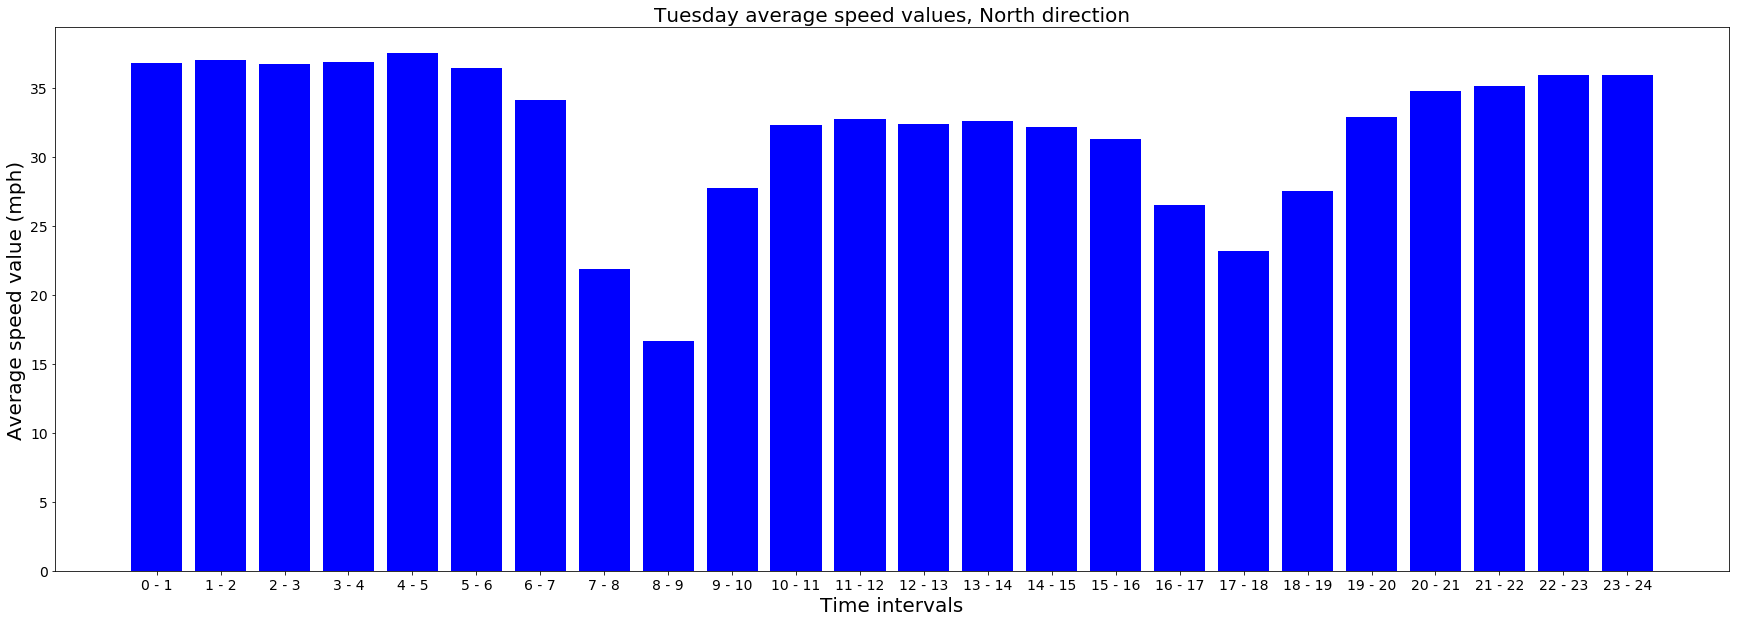

,Average speed (mph)
0,36.795970
1,36.991361
2,36.697429
3,36.845627
4,37.500441
5,36.406550
6,34.070056
7,21.837678
8,16.641537
9,27.724083


In [47]:
tue_north_speeds = get_speed_table(dataframe_1083, weekday='Tuesday', direction='North')
plot_avg_speed(tue_north_speeds, 'Tuesday', 'North')
tue_north_speeds

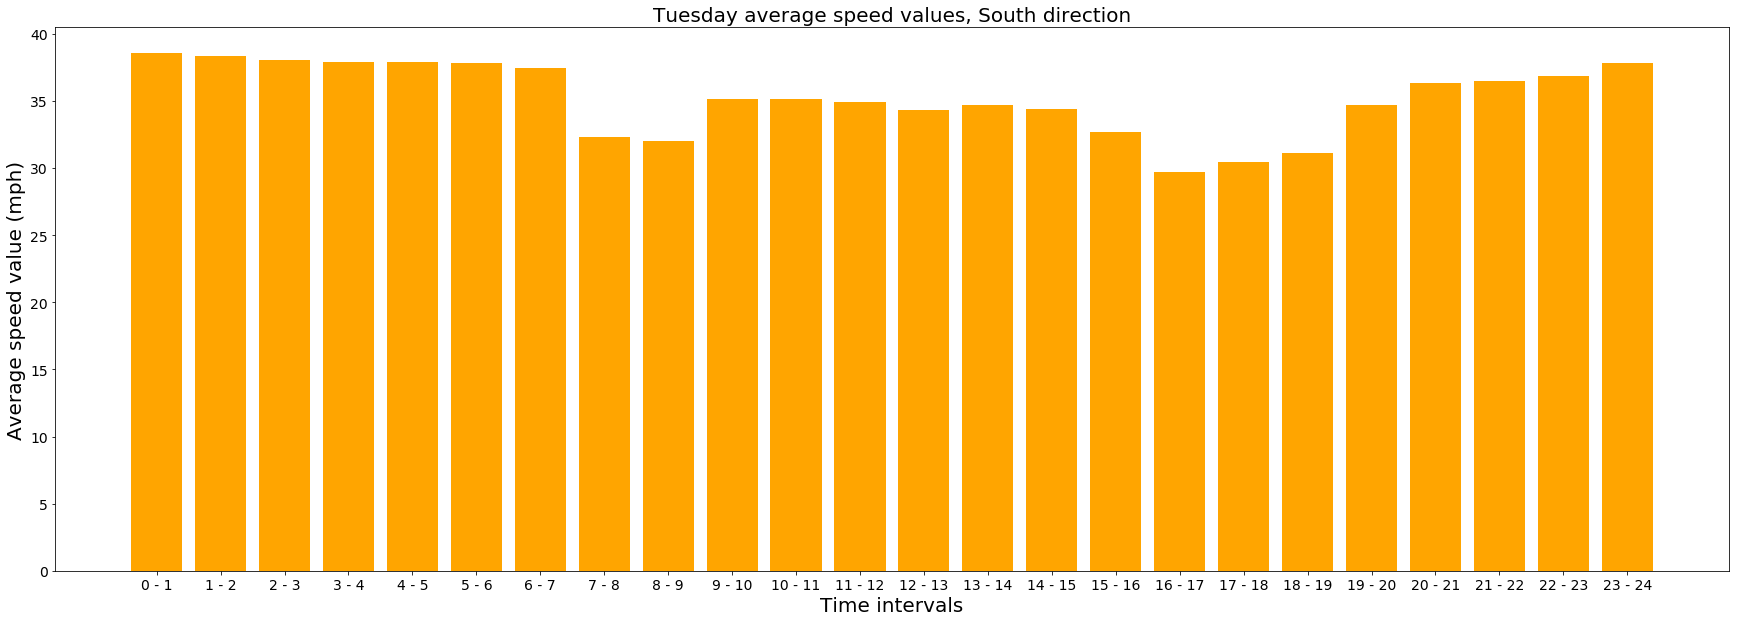

,Average speed (mph)
0,38.555642
1,38.340836
2,38.057961
3,37.882260
4,37.859846
5,37.821100
6,37.425685
7,32.276849
8,31.998327
9,35.121569


In [48]:
tue_south_speeds = get_speed_table(dataframe_1083, weekday='Tuesday', direction='South')
plot_avg_speed(tue_south_speeds, 'Tuesday', 'South', 'orange')
tue_south_speeds

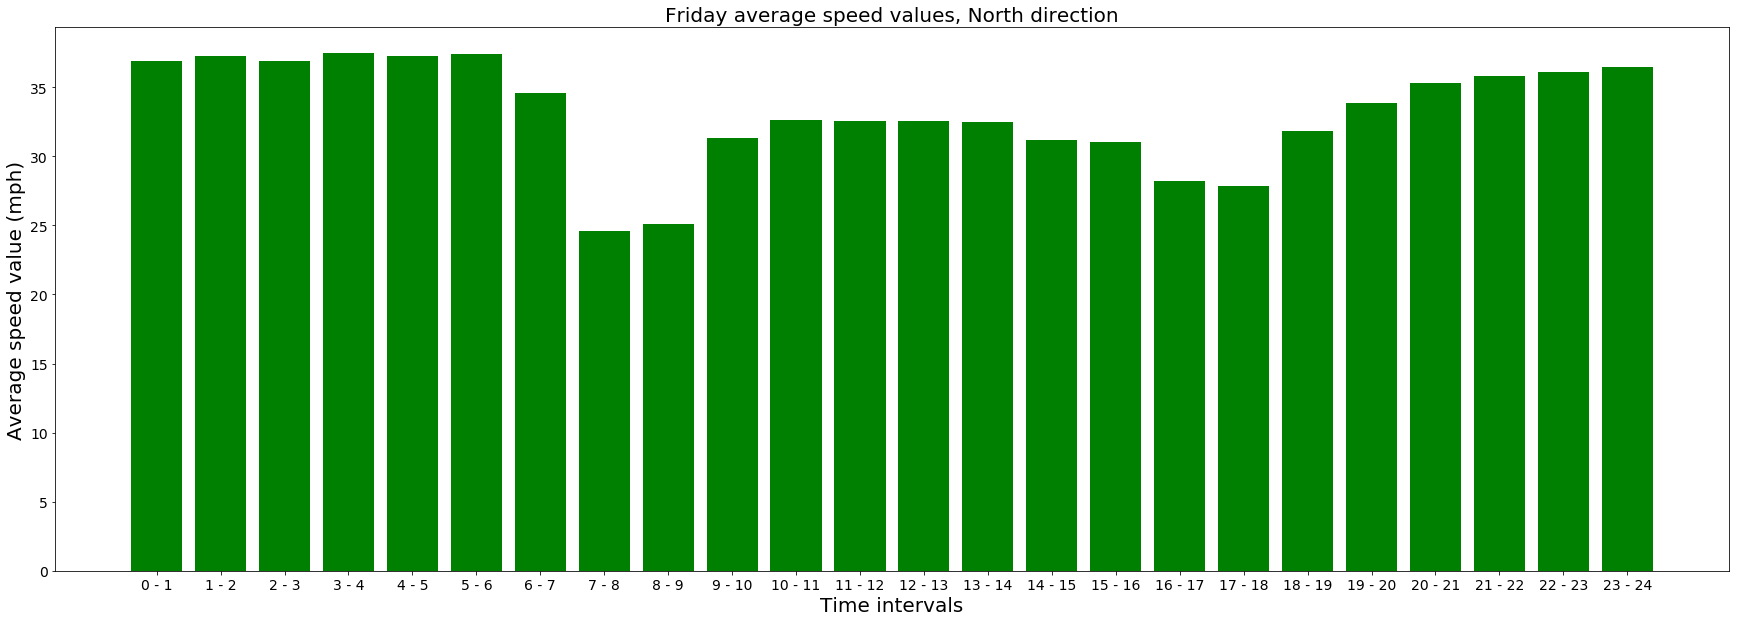

,Average speed (mph)
0,36.928511
1,37.235520
2,36.906214
3,37.471131
4,37.228371
5,37.393976
6,34.612912
7,24.593779
8,25.070731
9,31.310008


In [49]:
fri_north_speeds = get_speed_table(dataframe_1083, weekday='Friday', direction='North')
plot_avg_speed(fri_north_speeds, 'Friday', 'North', 'green')
fri_north_speeds

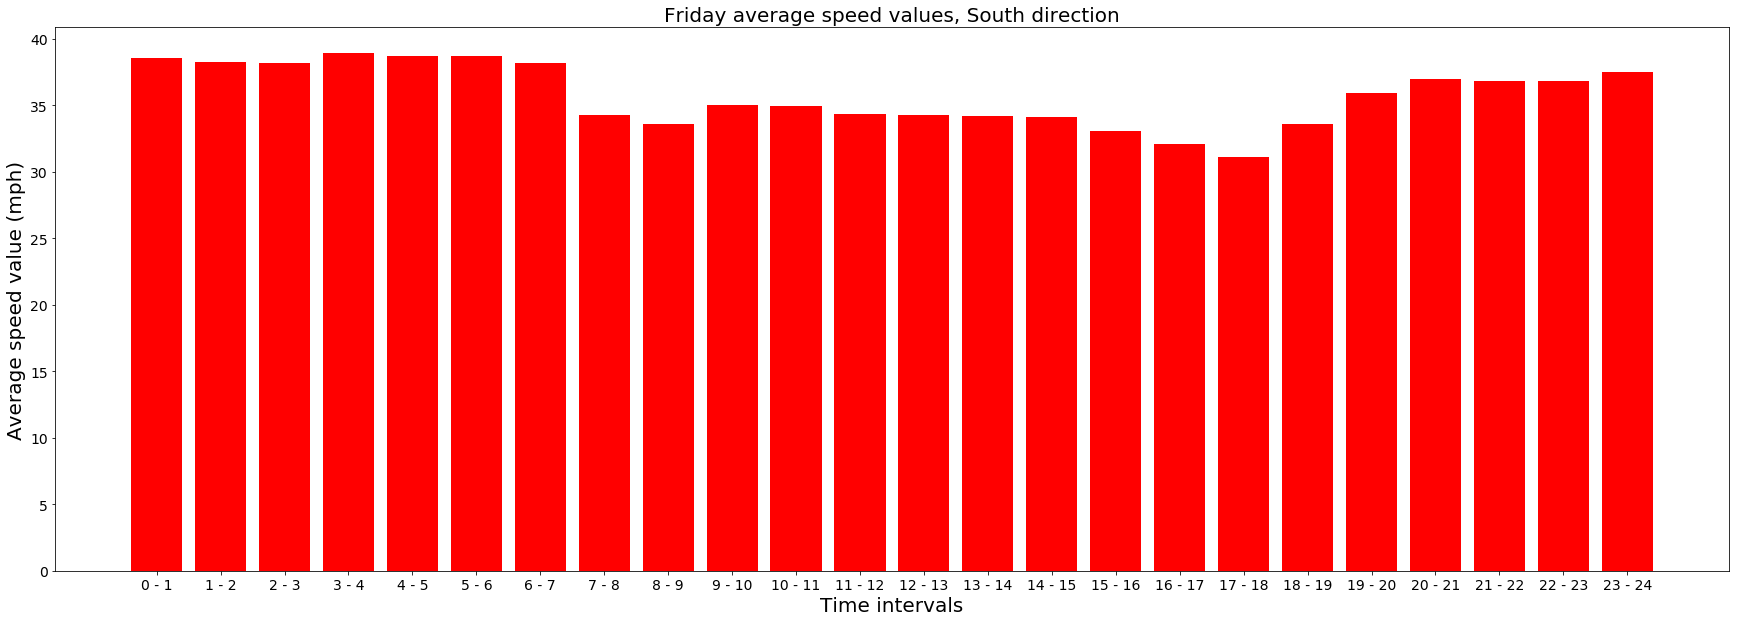

,Average speed (mph)
0,38.559340
1,38.278544
2,38.194529
3,38.930263
4,38.708311
5,38.748061
6,38.205633
7,34.295700
8,33.582561
9,35.029845


In [50]:
fri_south_speeds = get_speed_table(dataframe_1083, weekday='Friday', direction='South')
plot_avg_speed(fri_south_speeds, 'Friday', 'South', 'red')
fri_south_speeds

# Task 6

In [64]:
# put datasets' paths into the list
datasets_path = 'C:/Users/User/Desktop/Masters/DataEng/coursework/datasets/'
filenames = [datasets_path + x for x in os.listdir(datasets_path)]
print filenames

['C:/Users/User/Desktop/Masters/DataEng/coursework/datasets/rawpvr_2018-02-01_28d_1083 TueFri.csv', 'C:/Users/User/Desktop/Masters/DataEng/coursework/datasets/rawpvr_2018-02-01_28d_1415 TueFri.csv']


In [65]:
# read 1803 dataset and print first five rows
dataframe_1083 = pd.read_csv(filenames[0], sep=',')
dataframe_1083.head(5)

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
0,2018-02-02 00:00:03.050000,6,SB_NS,2,South,38.525,NaN,NaN,0,NaN
1,2018-02-02 00:00:22.010000,5,SB_MID,2,South,32.310,NaN,NaN,0,NaN
2,2018-02-02 00:00:22.020000,4,SB_OS,2,South,44.739,NaN,NaN,0,NaN
3,2018-02-02 00:00:36.040000,6,SB_NS,2,South,33.554,NaN,NaN,0,NaN
4,2018-02-02 00:00:49.070000,6,SB_NS,2,South,39.768,12.3,11.847,0,NaN


In [66]:
# read 1415 dataset and print first five rows
dataframe_1415 = pd.read_csv(filenames[1], sep=',')
dataframe_1415.head(5)

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
0,2018-02-02 00:00:01.030000,3,SW,2,SouthWest,26.098,NaN,NaN,0,NaN
1,2018-02-02 00:00:03.090000,3,SW,2,SouthWest,34.176,1.636,1.171,0,NaN
2,2018-02-02 00:00:37.090000,3,SW,2,SouthWest,24.855,NaN,NaN,0,NaN
3,2018-02-02 00:00:40.090000,3,SW,2,SouthWest,36.661,2.380,2.523,0,NaN
4,2018-02-02 00:00:41.080000,2,NE_OS,1,NorthEast,16.155,NaN,NaN,0,NaN


In [67]:
# get date column into singal variable and convert to datetime format
data_datetime = pd.to_datetime(dataframe_1083['Date'])
dataframe_1083.Date = data_datetime
# set Flags column values using weekday function, +1 because counting starts from 0 (Monday) 
dataframe_1083['Flags'] = data_datetime.dt.weekday + 1
# set Flag Text column values using weekday_name function
dataframe_1083['Flag Text'] = data_datetime.dt.weekday_name
# print first 5 rows
dataframe_1083.head()

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
0,2018-02-02 00:00:03.050,6,SB_NS,2,South,38.525,NaN,NaN,5,Friday
1,2018-02-02 00:00:22.010,5,SB_MID,2,South,32.310,NaN,NaN,5,Friday
2,2018-02-02 00:00:22.020,4,SB_OS,2,South,44.739,NaN,NaN,5,Friday
3,2018-02-02 00:00:36.040,6,SB_NS,2,South,33.554,NaN,NaN,5,Friday
4,2018-02-02 00:00:49.070,6,SB_NS,2,South,39.768,12.3,11.847,5,Friday


In [68]:
# get date column into singal variable and convert to datetime format
data_datetime = pd.to_datetime(dataframe_1415['Date'])
dataframe_1415.Date = data_datetime
# set Flags column values using weekday function, +1 because counting starts from 0 (Monday) 
dataframe_1415['Flags'] = data_datetime.dt.weekday + 1
# set Flag Text column values using weekday_name function
dataframe_1415['Flag Text'] = data_datetime.dt.weekday_name
# print first 5 rows
dataframe_1415.head()

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
0,2018-02-02 00:00:01.030,3,SW,2,SouthWest,26.098,NaN,NaN,5,Friday
1,2018-02-02 00:00:03.090,3,SW,2,SouthWest,34.176,1.636,1.171,5,Friday
2,2018-02-02 00:00:37.090,3,SW,2,SouthWest,24.855,NaN,NaN,5,Friday
3,2018-02-02 00:00:40.090,3,SW,2,SouthWest,36.661,2.380,2.523,5,Friday
4,2018-02-02 00:00:41.080,2,NE_OS,1,NorthEast,16.155,NaN,NaN,5,Friday


In [69]:
north_lanes_1083 = dataframe_1083.loc[dataframe_1083['Direction Name'] == 'North']['Lane Name'].unique()
north_lanes_1415 = dataframe_1415.loc[dataframe_1415['Direction Name'] == 'NorthEast']['Lane Name'].unique()
print 'North Lanes for 1083 site:', north_lanes_1083
print'NorthEast Lanes for 1415 site:', north_lanes_1415
lanes = np.append(north_lanes_1083, north_lanes_1415)


North Lanes for 1083 site: ['NB_MID' 'NB_NS' 'NB_OS']
NorthEast Lanes for 1415 site: ['NE_OS' 'NE_NS']


In [70]:
average_speed_list = []
for lane in north_lanes_1083:
    tmp_speeds = dataframe_1083.loc[(dataframe_1083['Lane Name'] == lane) & \
                       (dataframe_1083['Flag Text'] == 'Friday') & \
                       (dataframe_1083['Date'].dt.hour == 17)]['Speed (mph)']
    average_speed_list.append(np.nanmean(tmp_speeds))
    
for lane in north_lanes_1415:
    tmp_speeds = dataframe_1415.loc[(dataframe_1415['Lane Name'] == lane) & \
                       (dataframe_1415['Flag Text'] == 'Friday') & \
                       (dataframe_1415['Date'].dt.hour == 17)]['Speed (mph)']
    average_speed_list.append(np.nanmean(tmp_speeds))
    
for i in range(len(average_speed_list)):
    print lanes[i] ,':', average_speed_list[i]    

NB_MID : 28.78130766803408
NB_NS : 24.889866801502457
NB_OS : 30.153216566265062
NE_OS : 27.15932220367279
NE_NS : 24.09657499069594


In [71]:
average_north_speed = np.mean(average_speed_list)
print 'Average speed for North lanes from both sites', average_north_speed, 'mph'

Average speed for North lanes from both sites 27.016057646034064 mph


In [72]:
distance = 4.86
mile_in_km = 0.6213711922
distance_in_miles = distance * mile_in_km
print 'Distance between the sites in miles:', distance_in_miles 

Distance between the sites in miles: 3.01986399409


In [76]:
journey_time_hours = distance_in_miles / average_north_speed
journey_time_mins = round(60 * journey_time_hours, 3)
sec = 60 * (journey_time_mins - int(journey_time_mins))
print 'Average journey time:', journey_time_mins
print 'Average journey time:', int(journey_time_mins), 'minutes,', sec, 'seconds'

Average journey time: 6.707
Average journey time: 6 minutes, 42.42 seconds
